In [1]:
from graph import Map, Graph
from evaluateRoleC import *
from evaluateRoleV import * 
from gui import *

### Generating the Game Map
- Quarantine -> Green
- Playground -> Yellow
- Vaccine -> Red
- Nothing -> Grey


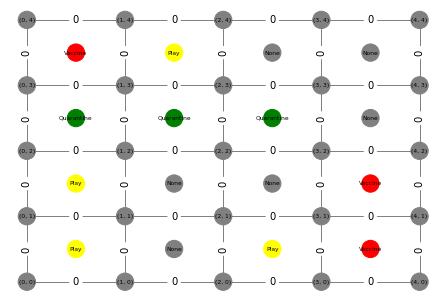

In [2]:

# Map(row, col) = Generates a map of (row col)
game_map = Map(4,4)

# use this to randomize grid
#game_map.randomizeGrid()

# Presets
preset = {
    "Quarantine": [(0,2),(1,2),(2,2)],
    "Play": [(0,0),(1,3),(0,1),(2,0)],
    "Vaccine":[(0,3), (3,1), (3,0)]
}

game_map.setPreset(preset)

# Generates the graph with edges and nodes of dimensions
#(row+1, col+1)
#All costs will be 0 until the paths are evaluated based on the role
game_map.generateGraph()

# Displays the game graph using Matplotlib and Networkx
#Filters out diagonals
viewMap(game_map, filter="V")


### Choose starting and end coordinates
1. Grid uses a coordination system
2. Choose a (row,col) block(Not the nodes) for starting and endpoints
    - eg. (0,0) will be the bottom left block, and (r,c) will be the top right block
3. Depending on the endpoints block type will determine the role to evaluate


Endpoint block type Vaccine
Solution path: [(0, 3)]
Total Cost 0


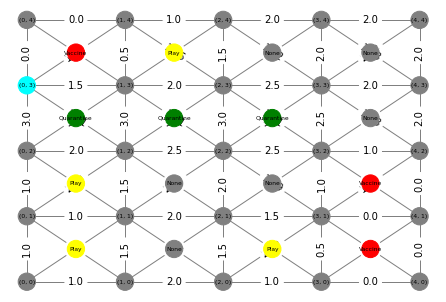

In [3]:
#Choose Starting Positions, using (row, col)
start=(0,3)

end=(0,3)

block_type = game_map.map[end]

print(f"Endpoint block type {block_type}")

results = None
total_cost = 0
filter_role = ""

if block_type == "Quarantine":
    role_c = {
        "Quarantine": 0, 
        "Vaccine": 2, 
        "Play": 3,
        "None": 1,
    }
    game_map.setCosts(role_c)
    start_node = (start[1]+1, start[0]+1)
    end_node = (end[1]+1, end[0]+1)
    
    results= evaluateRoleC(game_map, start_node, end_node, roleCHeuristic)
    #Filter out diagonal paths
    filter_role = "V"
    
elif block_type == "Vaccine":
    
    #Converts (row, col) -> (x,y)
    start_node = (start[1], end[0])
    end_node = (end[1], end[0])
    
    role_v = {
        "Quarantine": 3, 
        "Vaccine": 0, 
        "Play": 1,
        "None": 2,
    }
    game_map.setCosts(role_v)
    results= evaluateRoleV(game_map, start, end, roleVHeuristic)
    

if results == None:
    print("No path was found!")
else:
    total_cost = game_map.getGraph().graph[results[-1]].g_cost
    print(f"Solution path: {results}")
    print(f"Total Cost {total_cost}")
    viewMap(game_map, results, filter_role)


    
